In [98]:
from fbm import FBM
from matplotlib import pyplot as plt

In [99]:
f = FBM(n=19, hurst=0.5, length=1, method='daviesharte')

fbm_path1 = f.fbm()
times1 = f.times()

fbm_path2 = f.fbm()
times2 = f.times()

print(fbm_path1)
print(fbm_path2)

[0.         0.07634208 0.4892397  0.37700262 0.30376354 0.41657002
 0.35265069 0.57281402 0.69299874 0.72196642 0.86294361 0.98161248
 1.17888606 1.0084083  0.96764774 0.88869538 0.77322256 0.77841502
 1.02376538 1.04611763]
[ 0.         -0.51085336 -0.51407844 -0.39603161 -0.60363134 -0.67706579
 -0.4015183  -0.00420146 -0.0484994  -0.37862824 -0.44236929 -0.57606351
 -0.48780227 -0.68260665 -0.31972176 -0.40813896 -0.29076917 -0.05503824
 -0.14916388 -0.09168445]


### Generacja ścieżek fBm

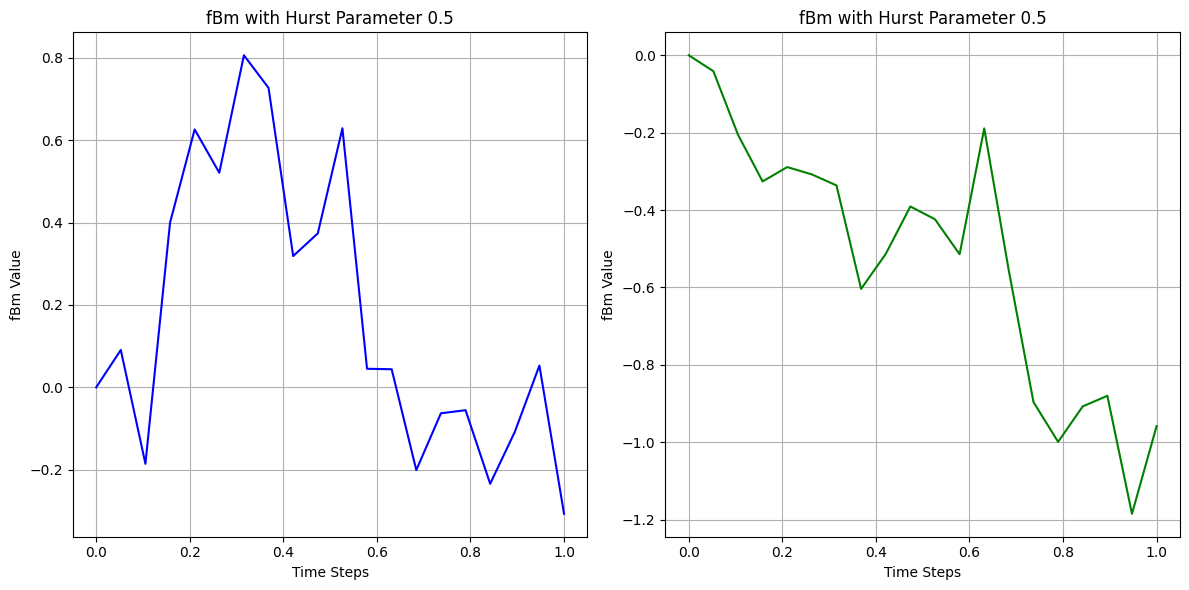

In [94]:
# plot fbm_sample with times
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first fBm path
ax1.plot(times1, fbm_path1, color='blue')
ax1.set_title('fBm with Hurst Parameter 0.5')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('fBm Value')
ax1.grid(True)

# Plot the second fBm path
ax2.plot(times2, fbm_path2, color='green')
ax2.set_title('fBm with Hurst Parameter 0.5')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('fBm Value')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

### Histogramy dla ścieżek fbm

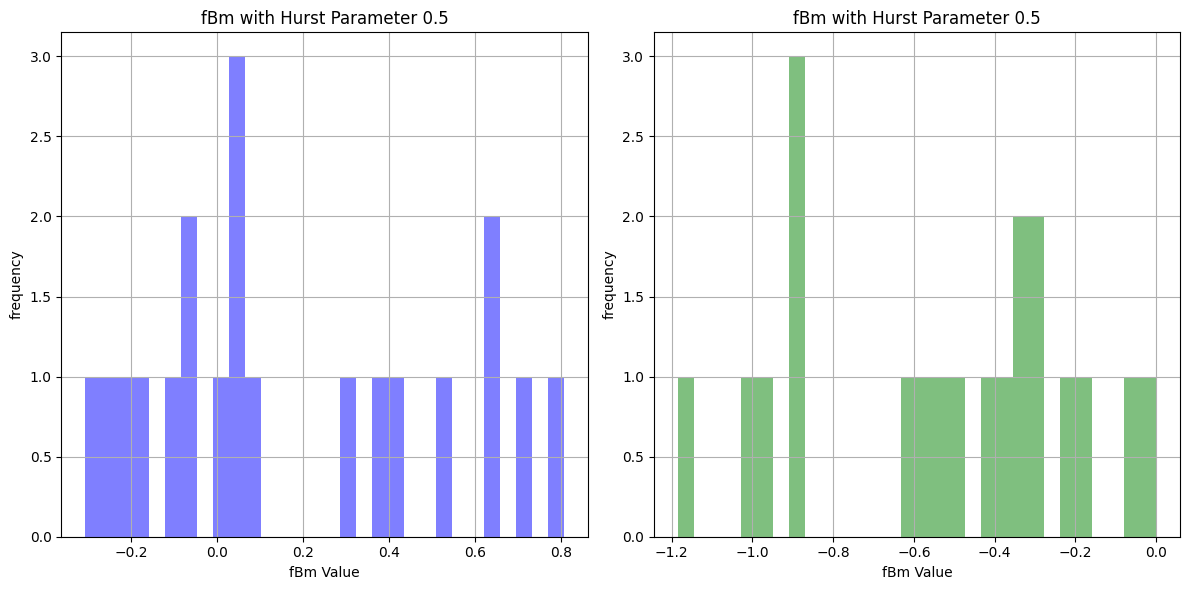

In [95]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first fBm path
ax1.hist(fbm_path1, bins=30, color='blue', alpha=0.5)
ax1.set_title('fBm with Hurst Parameter 0.5')
ax1.set_xlabel('fBm Value')
ax1.set_ylabel('frequency')
ax1.grid(True)

# Plot the second fBm path
ax2.hist(fbm_path2, bins=30, color='green', alpha=0.5)
ax2.set_title('fBm with Hurst Parameter 0.5')
ax2.set_xlabel('fBm Value')
ax2.set_ylabel('frequency')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

### Dystrybucja brzegowa fBm

 dla n ścieżek po czasie t

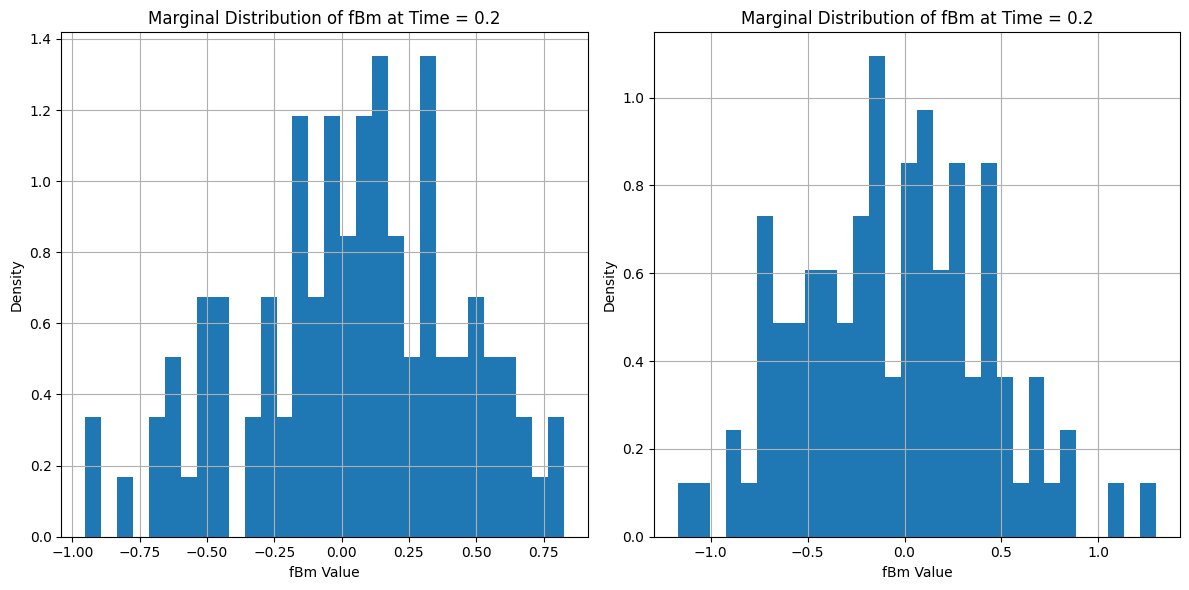

In [96]:
# Parameters
n_paths = 100  # number of fBm paths to simulate
n_points = 100  # number of points in each path
hurst = 0.5     # Hurst parameter
time1 = 0.2     # time at which to observe the marginal distribution
time2 = 0.2 # time at which to observe the marginal distribution

# Generate fBm paths
f = FBM(n=n_points, hurst=hurst, length=1, method='daviesharte')
fbm_values_at_time1 = [f.fbm()[int(time1*n_points)] for _ in range(n_paths)]  # Extract the end value of each path
f = FBM(n=n_points, hurst=hurst, length=1, method='daviesharte')
fbm_values_at_time2 = [f.fbm()[int(time2*n_points)] for _ in range(n_paths)]  # Extract the end value of each path

# Plot marginal distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(fbm_values_at_time1, bins=30, density=True)
ax1.set_title(f'Marginal Distribution of fBm at Time = {time1}')
ax1.set_xlabel('fBm Value')
ax1.set_ylabel('Density')
ax1.grid(True)

ax2.hist(fbm_values_at_time2, bins=30, density=True)
ax2.set_title(f'Marginal Distribution of fBm at Time = {time2}')
ax2.set_xlabel('fBm Value')
ax2.set_ylabel('Density')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [97]:
from scipy.stats import norm
import plotly.express as px
import pandas as pd
from statsmodels.distributions.copula.api import GaussianCopula

gaussian = GaussianCopula()

unif_1 = norm.cdf(fbm_values_at_time1)
unif_2 = norm.cdf(fbm_values_at_time2)
norm_data = pd.concat([pd.DataFrame(unif_1), pd.DataFrame(unif_2)], axis=1)
std_data = pd.concat([pd.DataFrame(fbm_values_at_time1), pd.DataFrame(fbm_values_at_time2)], axis=1)
std_data.columns = ['X', 'Y']
norm_data.columns = ['X', 'Y']
norm_data.corr()

fig = px.scatter(std_data, x = 'X', y='Y', width=700, height=500, trendline='ols', trendline_color_override='DeepPink', marginal_x='histogram', marginal_y='histogram', title='Bi-Variate Normal')
fig.show()

ModuleNotFoundError: No module named 'plotly'

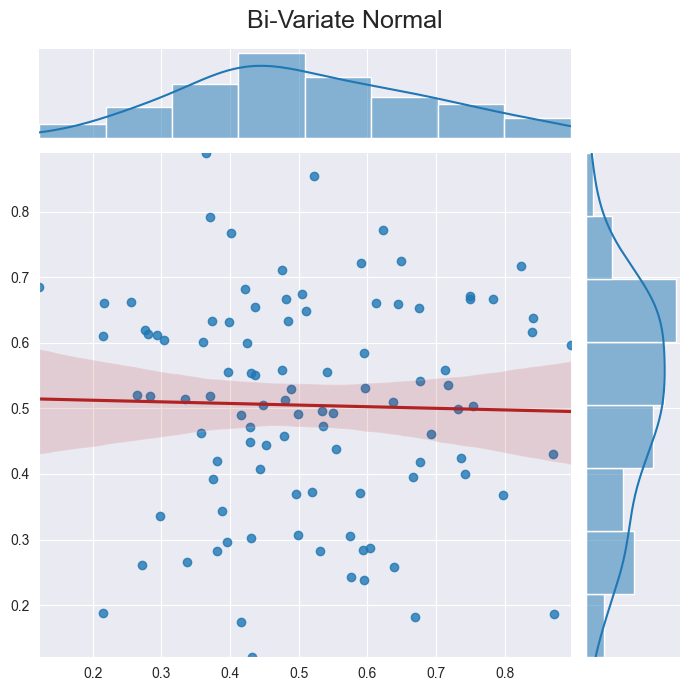

In [75]:
import seaborn as sns

joint_plot_height = 7
joint_grid = sns.jointplot(x=unif_1, y=unif_2, kind="reg", height=joint_plot_height, xlim=(unif_1.min(), unif_1.max()), ylim=(unif_2.min(), unif_2.max()),
                           joint_kws={"line_kws": {"color": "firebrick"}})

plt.suptitle("Bi-Variate Normal", fontsize=18)
plt.tight_layout()

In [76]:
import numpy as np

correlation_coefficient = np.corrcoef([fbm_values_at_time1, fbm_values_at_time2])[0, -1]
print(f"Corrlation between fbms: {correlation_coefficient:.4f}")

Corrlation between fbms: -0.0282


D:\Software\Projects\MiNI\S7\Fraktale\Projekt 2\fraktale-projekt2\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:5999: RuntimeWarning:

divide by zero encountered in divide

D:\Software\Projects\MiNI\S7\Fraktale\Projekt 2\fraktale-projekt2\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning:

invalid value encountered in sqrt

D:\Software\Projects\MiNI\S7\Fraktale\Projekt 2\fraktale-projekt2\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:5990: RuntimeWarning:

divide by zero encountered in power



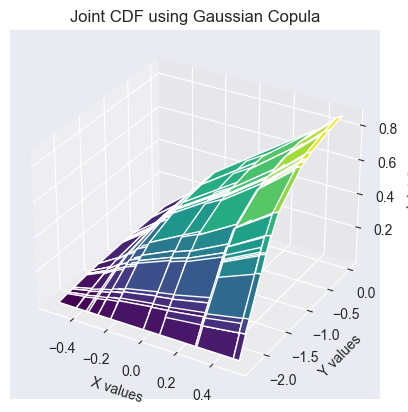

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from copulas.multivariate import GaussianMultivariate

# Create a grid of points
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(fbm_path1, fbm_path2)

# Convert points to their CDF values using the normal distribution
u = norm.cdf(X)
v = norm.cdf(Y)

# Combine the CDF values using a Gaussian copula
copula = GaussianMultivariate()
copula.fit(np.column_stack([u.flatten(), v.flatten()]))
cdf_values = copula.cdf(np.column_stack([u.flatten(), v.flatten()]))

# Reshape for plotting
Z = cdf_values.reshape(20, 20)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Joint CDF')
ax.set_title('Joint CDF using Gaussian Copula')

plt.show()

## Archimedesowe funkcje copula

Kopuły Archimedesowe są klasą kopuł używanych do modelowania zależności między zmiennymi losowymi. Kluczowym elementem tych kopuł jest funkcja generująca kopułę, znana również jako funkcja łącząca.

Niech  $( \\phi: [0, 1] \rightarrow [0, \infty] )$ będzie ciągłą, ściśle malejącą funkcją, której odwrotność $( \phi^{-1} )$ jest również ciągła na jej dziedzinie. Funkcja $ \phi $ jest nazywana funkcją generującą kopułę Archimedesową. Wtedy kopuła Archimedesowa $( C ) $ zdefiniowana jest dla $( u_1, u_2, ..., u_n \in [0, 1] ) $ (gdzie n jest wymiarem kopuły) jako:

$$ [ C(u_1, u_2, ..., u_n) = \phi^{-1}(\phi(u_1) + \phi(u_2) + ... + \phi(u_n)) ] $$

### Kluczowe cechy kopuł Archimedesowych:

1. **Funkcja generująca \( \phi \)**: Różne wybory funkcji \( \phi \) prowadzą do różnych rodzajów kopuł Archimedesowych. 

2. **Zależności między zmiennymi**: Kopuły Archimedesowe mogą modelować zarówno zależności prawostronne, jak i lewostronne.

3. **Elastyczność**: Kopuły te są bardzo elastyczne, co pozwala na modelowanie szerokiego zakresu zależności między zmiennymi.

4. **Wymiar**: Mogą być stosowane w przestrzeniach wielowymiarowych, co pozwala na modelowanie zależności między wieloma zmiennymi jednocześnie.


### Wizualizacja dystrybuanty łącznej opartej o rozkłady brzegowe z użyciem funkcji copula Gumbel

Funkcja copula Gumbel jest szczególnie przydatna w modelowaniu zależności ekstremalnych, tj. sytuacji, w których ekstremalne wartości jednej zmiennej mają tendencję do występowania razem z ekstremalnymi wartościami innej zmiennej. 
Aby zilustrować, jak funkcja copula Gumbel jest szczególnie przydatna w modelowaniu zależności ekstremalnych, generujemy dane, które mają silniejsze zależności w ekstremalnych wartościach. W tym celu wykorzystujemy wysoką korelację w macierzy kowariancji.

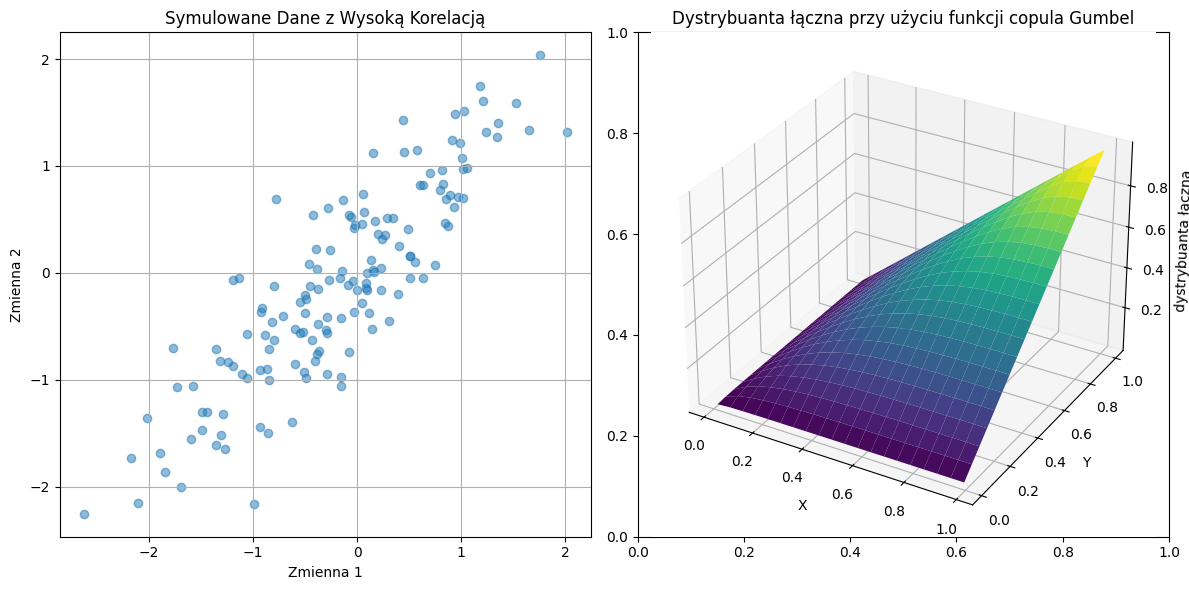

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
from pycopula.copula import ArchimedeanCopula

# Funkcja do generowania danych symulacyjnych
def generate_simulated_data(size=150, correlation=0.9):
    mean = [0, 0]
    cov = [[1, correlation], [correlation, 1]]  # Macierz kowariancji
    data = multivariate_normal(mean, cov).rvs(size)
    return data

# Generowanie danych symulacyjnych
simulated_data = generate_simulated_data()

# Przekształcenie danych do postaci unormowanej
u = norm.cdf(simulated_data[:, 0])
v = norm.cdf(simulated_data[:, 1])
#u = norm.cdf(fbm_path1)
#v = norm.cdf(fbm_path2)


# Utworzenie kopuły Gumbel
copula = ArchimedeanCopula(family="gumbel", dim=2)
copula.fit(np.column_stack([u, v]))

# Tworzenie siatki punktów dla wizualizacji dystrybuanty łącznej
x = np.linspace(0.01, 0.99, 20)
y = np.linspace(0.01, 0.99, 20)
X, Y = np.meshgrid(x, y)
cdf_values = copula.cdf(np.column_stack([X.flatten(), Y.flatten()]))
Z = np.array(cdf_values).reshape(20, 20)

# Ustawienie wykresów obok siebie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Wykres scatter danych symulacyjnych
ax1.scatter(simulated_data[:, 0], simulated_data[:, 1], alpha=0.5)
ax1.set_title("Symulowane Dane z Wysoką Korelacją")
ax1.set_xlabel("Zmienna 1")
ax1.set_ylabel("Zmienna 2")
ax1.grid(True)

# Wykres dystrybuanty łącznej
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_xlabel('X ')
ax2.set_ylabel('Y ')
ax2.set_zlabel('dystrybuanta łączna')
ax2.set_title('Dystrybuanta łączna przy użyciu funkcji copula Gumbel')

plt.tight_layout()
plt.show()



### Wizualizacja dystrybuanty łącznej opartej o rozkłady brzegowe z użyciem funkcji copula Clayton

Funkcja copula Claytona jest szczególnie dobra w modelowaniu zależności dolnych. Oznacza to, że jest ona efektywna w uchwyceniu sytuacji, w której niskie wartości jednej zmiennej są skorelowane z niskimi wartościami drugiej zmiennej. Zamiast używać symetrycznej macierzy kowariancji, stworzymy dane, które mają wyższą korelację w dolnych wartościach. Dodatkowy wykres pokazuje rozkład punktów danych, aby zilustrować, jak niskie wartości jednej zmiennej są związane z niskimi wartościami drugiej zmiennej

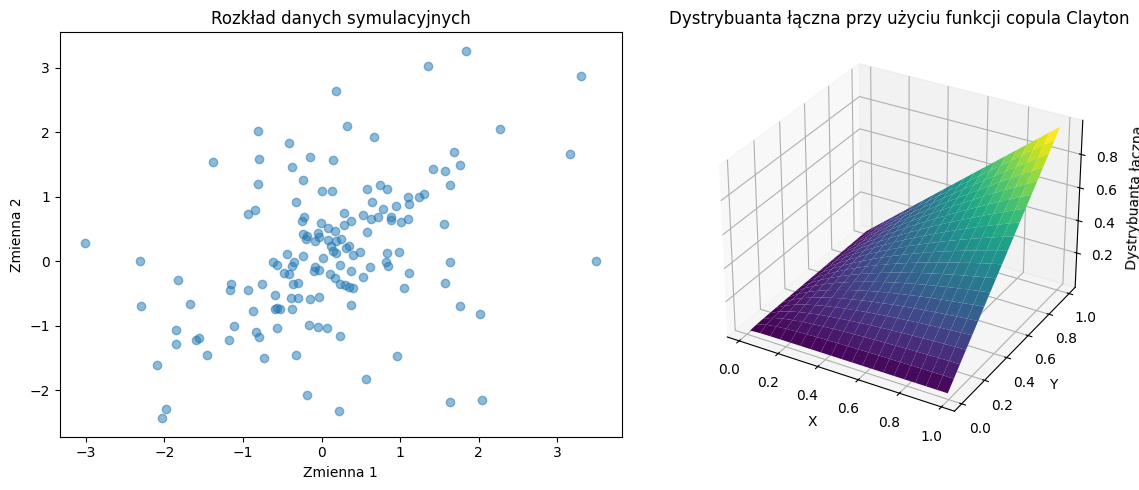

In [122]:
##### import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
from pycopula.copula import ArchimedeanCopula

# Funkcja do generowania danych symulacyjnych z większą korelacją dolną
def generate_simulated_data(size=150, lower_corr=0.9, upper_corr=0.1):
    # Generowanie dwóch różnych zestawów danych
    lower_data = multivariate_normal([0, 0], [[1, lower_corr], [lower_corr, 1]]).rvs(size=int(size/2))
    upper_data = multivariate_normal([0, 0], [[1, upper_corr], [upper_corr, 1]]).rvs(size=int(size/2))
    
    # Łączenie danych, koncentrując się na dolnych korelacjach
    return np.vstack([lower_data, upper_data])

# Generowanie danych symulacyjnych
simulated_data = generate_simulated_data()

# Przekształcenie danych do postaci unormowanej
u = norm.cdf(simulated_data[:, 0])
v = norm.cdf(simulated_data[:, 1])

# Utworzenie kopuły Clayton
copula = ArchimedeanCopula(family="clayton", dim=2)
copula.fit(np.column_stack([u, v]))

# Tworzenie siatki punktów dla wizualizacji
x = np.linspace(0.01, 0.99, 20)
y = np.linspace(0.01, 0.99, 20)
X, Y = np.meshgrid(x, y)

# Obliczenie wspólnej dystrybuanty
cdf_values = copula.cdf(np.column_stack([X.flatten(), Y.flatten()]))

# Przekształcenie wyników do właściwego kształtu
Z = np.array(cdf_values).reshape(20, 20)

# Wizualizacja
fig = plt.figure(figsize=(12, 5))

# 3D dla CDF
ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('X ')
ax1.set_ylabel('Y ')
ax1.set_zlabel('Dystrybuanta łączna')
ax1.set_title('Dystrybuanta łączna przy użyciu funkcji copula Clayton')

# 2D dla danych
ax2 = fig.add_subplot(121)
ax2.scatter(simulated_data[:, 0], simulated_data[:, 1], alpha=0.5)
ax2.set_xlabel('Zmienna 1')
ax2.set_ylabel('Zmienna 2')
ax2.set_title('Rozkład danych symulacyjnych')

plt.tight_layout()
plt.show()


### Wizualizacja dystrybuanty łącznej opartej o rozkłady brzegowe z użyciem funkcji copula Frank
Funkcja copula Franka jest zdolna do modelowania zarówno zależności dodatnich, jak i ujemnych, co czyni ją uniwersalnym narzędziem w analizie danych. Jest symetryczna, co oznacza, że traktuje zmienne w równy sposób, nie faworyzując żadnej z nich.

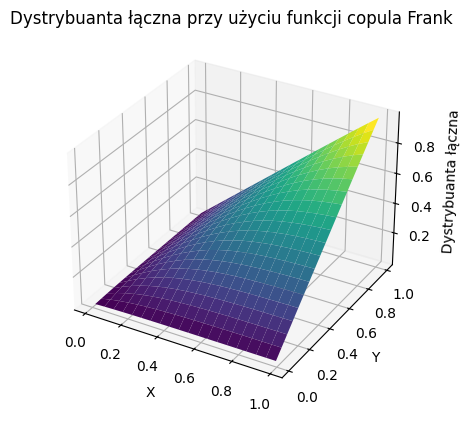

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
from pycopula.copula import ArchimedeanCopula

# Funkcja do generowania danych symulacyjnych
def generate_simulated_data(size=100, correlation=0.7):
    mean = [0, 0]
    cov = [[1, correlation], [correlation, 1]]  # Macierz kowariancji
    data = multivariate_normal(mean, cov).rvs(size)
    return data

# Generowanie danych symulacyjnych
simulated_data = generate_simulated_data()

# Przekształcenie danych do postaci unormowanej
u = norm.cdf(simulated_data[:, 0])
v = norm.cdf(simulated_data[:, 1])

# Utworzenie kopuły Frank
copula = ArchimedeanCopula(family="frank", dim=2)
copula.fit(np.column_stack([u, v]))

# Tworzenie siatki punktów dla wizualizacji
x = np.linspace(0.01, 0.99, 20)
y = np.linspace(0.01, 0.99, 20)
X, Y = np.meshgrid(x, y)

# Obliczenie wspólnej dystrybuanty
cdf_values = copula.cdf(np.column_stack([X.flatten(), Y.flatten()]))

# Przekształcenie wyników do właściwego kształtu
Z = np.array(cdf_values).reshape(20, 20)

# Wizualizacja
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel(' Dystrybuanta łączna')
ax.set_title('Dystrybuanta łączna przy użyciu funkcji copula Frank')

plt.show()